In [44]:
import numpy as np
import matplotlib.pyplot as plt 

Error of R: [1300.1, 852.1, 355.1, 266.1, 152.2, 108.14999999999999, 75.1, 32.1, 19.8, 13.29, 9.79, 7.9399999999999995, 2.555, 1.455, 1.05, 0.5195000000000001, 0.326, 0.212, 0.18]
Error of V1: [0.0888, 0.09040000000000001, 0.0936, 0.0936, 0.0952, 0.0952, 0.096, 0.0968, 0.0968, 0.0968, 0.0968, 0.0968, 0.0984, 0.0984, 0.09920000000000001, 0.1, 0.10160000000000001, 0.10320000000000001, 0.1]
Error of V2: [0.0888, 0.09040000000000001, 0.0936, 0.0952, 0.0952, 0.0952, 0.096, 0.0968, 0.0968, 0.0968, 0.0968, 0.0968, 0.0984, 0.09920000000000001, 0.0984, 0.1, 0.1, 0.10160000000000001, 0.1]
Uncertainties of Z is: [9.58030053e+03 6.24724011e+03 2.57845415e+03 1.88670937e+03
 1.09982141e+03 7.81303835e+02 5.41148987e+02 2.30406812e+02
 1.41849554e+02 9.49790149e+01 6.97798100e+01 5.64602369e+01
 1.76165918e+01 9.62186824e+00 6.88891882e+00 3.01146024e+00
 1.66046499e+00 8.31391984e-01 5.93632883e-01]
[ 1.84817111e+06 -1.52235491e+03]
[[ 3.96995499e+08 -7.54107284e+06]
 [-7.54107284e+06  6.60011195e+

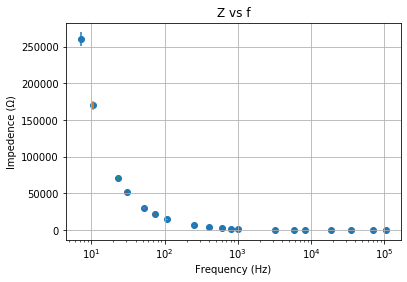

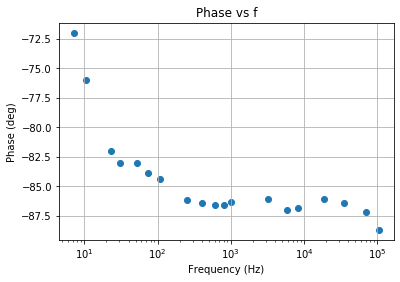

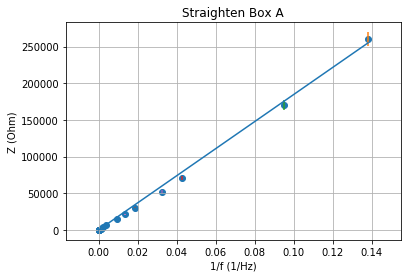

In [58]:
#data for box A
V1_a = np.array([3.44,3.52,3.68,3.68,3.76,3.76,3.8,3.84,3.84,3.84,3.84,3.84,3.92,3.92,3.96,4,4.08,4.16,4])
phase_a = np.array([-72,-76,-82,-83,-83,-83.9,-84.4,-86.2,-86.4,-86.6,-86.6,-86.3,-86.1,-87,-86.8,-86.1,-86.4,-87.2,-88.7])
f_a = np.array([7.246,10.53,23.42,30.96,53.03,73.52,106.25,250.74,402.57,600.35,813.3,999,3267,5900,8327,18920,35371,71386,104405])
V2_a = np.array([3.44,3.52,3.68,3.76,3.76,3.76,3.8,3.84,3.84,3.84,3.84,3.84,3.92,3.96,3.92,4,4,4.08,4])
R_a = np.array([260000,170400,71000,53200,30420,21610,15000,6400,3940,2638,1938,1568,491,271,190,83.9,45.2,22.4,16])

z_a = V1_a/V2_a * R_a

#find the error of R
R_a_list = [260000,170400,71000,53200,30420,21610,15000,6400,3940,2638,1938,1568,491,271,190,83.9,45.2,22.4,16]

R_sigma_list = []

for n in range(len(R_a_list)):
    if isinstance(R_a_list[n],float) == True:
        R_sigma = R_a[n]*0.005 + 0.1
    elif isinstance(R_a_list[n],int) == True:
        R_sigma = R_a[n]*0.005 + 0.1 
    
    R_sigma_list.append(R_sigma)
    
print("Error of R: " + str(R_sigma_list))

#find the error of V1
V1_a_list = [3.44,3.52,3.68,3.68,3.76,3.76,3.8,3.84,3.84,3.84,3.84,3.84,3.92,3.92,3.96,4,4.08,4.16,4]

V1_sigma_list = []

for n in range(len(V1_a_list)):
    if isinstance(V1_a_list[n],float) == True:
        V1_sigma = V1_a[n]*0.02 + 0.02
    elif isinstance(V1_a_list[n],int) == True:
        V1_sigma = V1_a[n]*0.02 + 0.02 
    
    V1_sigma_list.append(V1_sigma)
    
print("Error of V1: " + str(V1_sigma_list))

#find the error of V2
V2_a_list = [3.44,3.52,3.68,3.76,3.76,3.76,3.8,3.84,3.84,3.84,3.84,3.84,3.92,3.96,3.92,4,4,4.08,4]

V2_sigma_list = []

for n in range(len(V2_a_list)):
    if isinstance(V2_a_list[n],float) == True:
        V2_sigma = V2_a[n]*0.02 + 0.02
    elif isinstance(V2_a_list[n],int) == True:
        V2_sigma = V2_a[n]*0.02 + 0.02 
    
    V2_sigma_list.append(V2_sigma)
    
print("Error of V2: " + str(V2_sigma_list))

#sigma of impedence
Z_a_1 = np.array(V1_sigma_list)**2 * (R_a/V2_a)**2
Z_a_2 = np.array(V2_sigma_list)**2 * ((V1_a * R_a)/V2_a**2)**2
Z_a_3 = np.array(R_sigma_list)**2 * (V1_a/V2_a)**2
Z_sigma_a = np.sqrt(Z_a_1 + Z_a_2 + Z_a_3)
print("Uncertainties of Z is: " + str(Z_sigma_a))

#plot z vs f 
plt.figure(1)
plt.title("Z vs f")
plt.ylabel("Impedence (Ω)")
plt.xlabel("Frequency (Hz)")
plt.scatter(f_a,z_a)
plt.xscale("log")
plt.grid(True)

#error bar
plt.figure(1)
for n in range(len(Z_sigma_a)):
    plt.errorbar(f_a[n],z_a[n],Z_sigma_a[n])

#plot phase vs f 
plt.figure(2)
plt.title("Phase vs f")
plt.ylabel("Phase (deg)")
plt.xlabel("Frequency (Hz)")
plt.scatter(f_a,phase_a)
plt.xscale("log")
plt.grid(True)

#straighten the data 
plt.figure(3)
plt.title("Straighten Box A")
plt.ylabel("Z (Ohm)")
plt.xlabel("1/f (1/Hz)")
plt.scatter(1/f_a,z_a)
plt.grid(True)
plt.plot(1/(f_a), 1.84817111e+06*(1/f_a)) #line of best fit

#error bar
plt.figure(3)
for n in range(len(Z_sigma_a)):
    plt.errorbar(1/(f_a[n]),z_a[n],Z_sigma_a[n])

#fitting
z_a,cov_a = np.polyfit(1/(f_a),z_a,1,cov=True)
print(z_a)
print(cov_a)
std_a = np.sqrt(np.diag(cov_a))
print("The uncertainty of the slope is:" + str(std_a))
#line of best fit

capacitance_a = 1/(2*np.pi*1.84817111e+06)
print("The capacitance is: " + str(capacitance_a))
      
      

Error of R: [11.195, 10.945, 10.979999999999999, 10.995, 9.69, 9.139999999999999, 8.54, 7.99, 7.365, 5.705, 3.995, 2.9800000000000004, 2.15, 1.743, 1.415, 1.175, 0.95]
Error of V1: [0.0728, 0.0736, 0.0728, 0.0728, 0.0752, 0.076, 0.0776, 0.0776, 0.0784, 0.08320000000000001, 0.0872, 0.09040000000000001, 0.09280000000000001, 0.09440000000000001, 0.096, 0.0968, 0.0976]
Error of V2: [0.0728, 0.0736, 0.0728, 0.0728, 0.0752, 0.076, 0.0776, 0.0776, 0.0792, 0.08320000000000001, 0.0872, 0.09040000000000001, 0.09280000000000001, 0.09440000000000001, 0.096, 0.0968, 0.0976]
Uncertainties of Z is: [86.48425705 84.17766684 84.79362057 84.91157194 73.77325902 69.23971923
 64.13063248 59.90315193 54.07454489 41.39077687 28.14198246 20.41238042
 14.2247431  11.21122427  8.7963387   7.05034491  5.42001054]
[4.05018493e-15 2.35174856e-07]
[[ 2.13053047e-34 -3.38102851e-25]
 [-3.38102851e-25  2.34505293e-15]]
The uncertainty of the slope and y-intercept is:[1.45963368e-17 4.84257466e-08]
C of box f is: 1.0

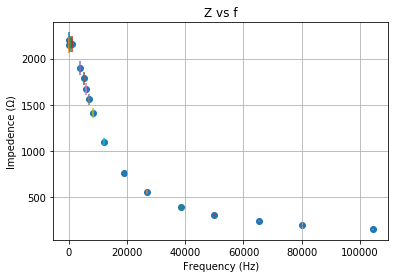

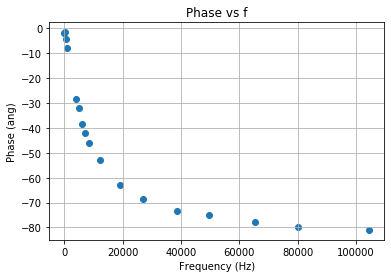

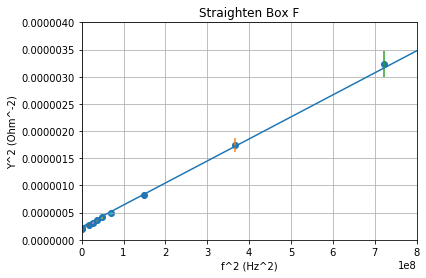

In [52]:
#data for box F 
V1_f = np.array([2.64,2.68,2.64,2.64,2.76,2.8,2.88,2.88,2.92,3.16,3.36,3.52,3.64,3.72,3.8,3.84,3.88])
phase_f = np.array([-2,-1.53,-4.42,-8,-28.3,-32,-38.4,-42,-46,-53,-63,-68.6,-73.3,-75,-78,-79.7,-81])
f_f = np.array([29.24,105,511.52,1002,4085,5137,6061,7034,8333,12236,19146,26877,38712,49758,65255,79996,104438])
V2_f = np.array([2.64,2.68,2.64,2.64,2.76,2.8,2.88,2.88,2.96,3.16,3.36,3.52,3.64,3.72,3.8,3.84,3.88])
R_f = np.array([2199,2149,2156,2159,1898,1788,1668,1558,1433,1101,759,556,390,308.6,243,195,150])

z_f = V1_f/V2_f * R_f

#find the error of R
R_f_list = [2199,2149,2156,2159,1898,1788,1668,1558,1433,1101,759,556,390,308.6,243,195,150]

R_sigma_list_f = []

for n in range(len(R_f_list)):
    if isinstance(R_f_list[n],float) == True:
        R_sigma_f = R_f[n]*0.005 + 0.2
    elif isinstance(R_f_list[n],int) == True:
        R_sigma_f = R_f[n]*0.005 + 0.2 
    
    R_sigma_list_f.append(R_sigma_f)
    
print("Error of R: " + str(R_sigma_list_f))

#find the error of V1
V1_f_list = [2.64,2.68,2.64,2.64,2.76,2.8,2.88,2.88,2.92,3.16,3.36,3.52,3.64,3.72,3.8,3.84,3.88]

V1_sigma_list_f = []

for n in range(len(V1_f_list)):
    if isinstance(V1_f_list[n],float) == True:
        V1_sigma_f = V1_f[n]*0.02 + 0.02
    elif isinstance(V1_f_list[n],int) == True:
        V1_sigma_f = V1_f[n]*0.02 + 0.02 
    
    V1_sigma_list_f.append(V1_sigma_f)
    
print("Error of V1: " + str(V1_sigma_list_f))

#find the error of V2
V2_f_list = [2.64,2.68,2.64,2.64,2.76,2.8,2.88,2.88,2.96,3.16,3.36,3.52,3.64,3.72,3.8,3.84,3.88]

V2_sigma_list_f = []

for n in range(len(V2_f_list)):
    if isinstance(V2_f_list[n],float) == True:
        V2_sigma_f = V2_f[n]*0.02 + 0.02
    elif isinstance(V2_f_list[n],int) == True:
        V2_sigma_f = V2_f[n]*0.02 + 0.02 
    
    V2_sigma_list_f.append(V2_sigma_f)
    
print("Error of V2: " + str(V2_sigma_list_f))

#sigma of impedence
Z_f_1 = np.array(V1_sigma_list_f)**2 * (R_f/V2_f)**2
Z_f_2 = np.array(V2_sigma_list_f)**2 * ((V1_f * R_f)/V2_f**2)**2
Z_f_3 = np.array(R_sigma_list_f)**2 * (V1_f/V2_f)**2
Z_sigma_f = np.sqrt(Z_f_1 + Z_f_2 + Z_f_3)
print("Uncertainties of Z is: " + str(Z_sigma_f))

#plot z vs f 
plt.figure(1)
plt.title("Z vs f")
plt.ylabel("Impedence (Ω)")
plt.xlabel("Frequency (Hz)")
plt.scatter(f_f,z_f)
plt.grid(True)

#error bar
plt.figure(1)
for n in range(len(Z_sigma_f)):
    plt.errorbar(f_f[n],z_f[n],Z_sigma_f[n])

#plot phase vs f 
plt.figure(2)
plt.title("Phase vs f")
plt.ylabel("Phase (ang)")
plt.xlabel("Frequency (Hz)")
plt.scatter(f_f,phase_f)
plt.grid(True)

#straigten plot of box F #cut off four last points to show the first few point more clearer
plt.figure(3)
plt.title("Straighten Box F")
plt.scatter(f_f**2,1/z_f**2)
plt.xlabel("f^2 (Hz^2)")
plt.ylabel("Y^2 (Ohm^-2)")
plt.xlim(0,0.8e+09)
plt.ylim(0,0.000004)
plt.grid(True)
plt.plot(f_f**2,4.05018493e-15*(f_f)**2 + 2.35174856e-07) #line of best fit


#error bar
plt.figure(3)
for n in range(len(Z_sigma_f)):
    plt.errorbar(f_f[n]**2,1/z_f[n]**2,2*(Z_sigma_f[n]/z_f[n]) * 1/z_f[n]**2)

#fitting
z_f,cov_f = np.polyfit(f_f**2,1/z_f**2,1,cov=True)
print(z_f)
print(cov_f)
std_f = np.sqrt(np.diag(cov_f))
print("The uncertainty of the slope and y-intercept is:" + str(std_f))

capacitance_f = np.sqrt(4.05018493e-15/(4*(np.pi**2)))
print("C of box f is: " +str(capacitance_f))
resistance_f = np.sqrt(1/2.35174856e-07)
print("R of box f is: " +str(resistance_f))

Error of R: [0.6525, 0.6555, 0.6565, 0.6565, 0.6565, 0.675, 0.7055, 0.7609999999999999, 0.8690000000000001, 1.2500000000000002, 1.8450000000000002, 2.745, 3.495, 4.895, 9.59, 22.8, 42.6, 51.6, 53.1, 38.85, 31.05, 22.8, 12.94, 8.845, 7.39, 5.455, 3.31, 1.6130000000000002, 1.151]
Error of V1: [0.0728, 0.0728, 0.07200000000000001, 0.07200000000000001, 0.07200000000000001, 0.0728, 0.0736, 0.07440000000000001, 0.0776, 0.08320000000000001, 0.0872, 0.09040000000000001, 0.0912, 0.09280000000000001, 0.0912, 0.08480000000000001, 0.0776, 0.07440000000000001, 0.0736, 0.0792, 0.0824, 0.0864, 0.09280000000000001, 0.096, 0.096, 0.0976, 0.09920000000000001, 0.1, 0.0984]
Error of V2: [0.07200000000000001, 0.07200000000000001, 0.0728, 0.07200000000000001, 0.07200000000000001, 0.0728, 0.0736, 0.07440000000000001, 0.0768, 0.08320000000000001, 0.0872, 0.0896, 0.0912, 0.09200000000000001, 0.09040000000000001, 0.08480000000000001, 0.0776, 0.07440000000000001, 0.07440000000000001, 0.0792, 0.0824, 0.0864, 0.09

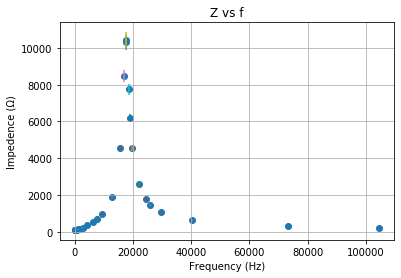

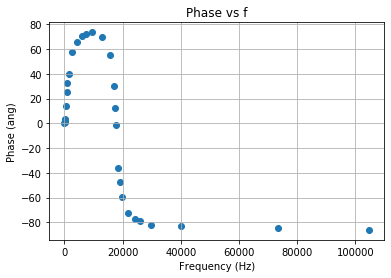

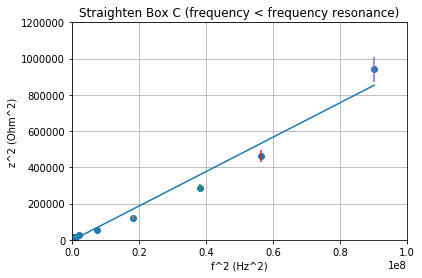

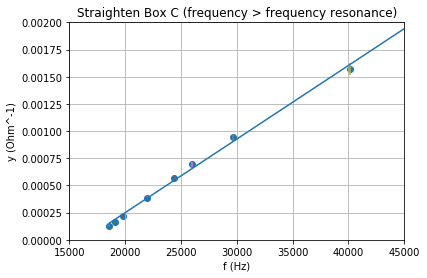

In [56]:
#data for box C 
V1_c = np.array([2.64,2.64,2.6,2.6,2.6,2.64,2.68,2.72,2.88,3.16,3.36,3.52,3.56,3.64,3.56,3.24,2.88,2.72,2.68,2.96,3.12,3.32,3.64,3.8,3.8,3.88,3.96,4,3.92])
phase_c = np.array([0.5,1,1.46,2.69,3.7,14.3,25.2,33,40.2,57.4,65.7,70.3,72.4,73.6,69.8,55.2,30.5,12.3,-1,-36.4,-47.7,-59.7,-72.3,-77,-79.3,-82.1,-83.2,-84.7,-86.1])
f_c = np.array([9.33,37.82,50.61,74.85,102.9,413.2,761.13,1028,1467,2698,4277,6184,7519,9497,12840,15560,16920,17450,17767,18589,19070,19810,21930,24340,25990,29710,40120,73260,104600])
V2_c = np.array([2.6,2.6,2.64,2.6,2.6,2.64,2.68,2.72,2.84,3.16,3.36,3.48,3.56,3.6,3.52,3.24,2.88,2.72,2.72,2.96,3.12,3.32,3.6,3.76,3.84,3.92,4,4,4])
R_c = np.array([110.5,111.1,111.3,111.3,111.3,115,121.1,132.2,153.8,230,349,529,679,959,1898,4540,8500,10300,10600,7750,6190,4540,2568,1749,1458,1071,642,302.6,210.2])

z_c=V1_c/V2_c*R_c
z_c_lesser = z_c[0:18]
z_c_greater = z_c[19:30]

#find the error of R
R_c_list = [110.5,111.1,111.3,111.3,111.3,115,121.1,132.2,153.8,230,349,529,679,959,1898,4540,8500,10300,10600,7750,6190,4540,2568,1749,1458,1071,642,302.6,210.2]

R_sigma_list_c = []

for n in range(len(R_c_list)):
    if isinstance(R_c_list[n],float) == True:
        R_sigma_c = R_c[n]*0.005 + 0.1
    elif isinstance(R_c_list[n],int) == True:
        R_sigma_c = R_c[n]*0.005 + 0.1 
    
    R_sigma_list_c.append(R_sigma_c)
    
print("Error of R: " + str(R_sigma_list_c))

#find the error of V1
V1_c_list = [2.64,2.64,2.6,2.6,2.6,2.64,2.68,2.72,2.88,3.16,3.36,3.52,3.56,3.64,3.56,3.24,2.88,2.72,2.68,2.96,3.12,3.32,3.64,3.8,3.8,3.88,3.96,4,3.92]

V1_sigma_list_c = []

for n in range(len(V1_c_list)):
    if isinstance(V1_c_list[n],float) == True:
        V1_sigma_c = V1_c[n]*0.02 + 0.02
    elif isinstance(V1_c_list[n],int) == True:
        V1_sigma_c = V1_c[n]*0.02 + 0.02 
    
    V1_sigma_list_c.append(V1_sigma_c)
    
print("Error of V1: " + str(V1_sigma_list_c))

#find the error of V2
V2_c_list = [2.6,2.6,2.64,2.6,2.6,2.64,2.68,2.72,2.84,3.16,3.36,3.48,3.56,3.6,3.52,3.24,2.88,2.72,2.72,2.96,3.12,3.32,3.6,3.76,3.84,3.92,4,4,4]

V2_sigma_list_c = []

for n in range(len(V2_c_list)):
    if isinstance(V2_c_list[n],float) == True:
        V2_sigma_c = V2_c[n]*0.02 + 0.02
    elif isinstance(V2_c_list[n],int) == True:
        V2_sigma_c = V2_c[n]*0.02 + 0.02 
    
    V2_sigma_list_c.append(V2_sigma_c)
    
print("Error of V2: " + str(V2_sigma_list_c))

#sigma of impedence
Z_c_1 = np.array(V1_sigma_list_c)**2 * (R_c/V2_c)**2
Z_c_2 = np.array(V2_sigma_list_c)**2 * ((V1_c * R_c)/V2_c**2)**2
Z_c_3 = np.array(R_sigma_list_c)**2 * (V1_c/V2_c)**2
Z_sigma_c = np.sqrt(Z_c_1 + Z_c_2 + Z_c_3)
print("Uncertainties of Z is: " + str(Z_sigma_c))

#plot z vs f
plt.figure(1)
plt.title("Z vs f")
plt.ylabel("Impedence (Ω)")
plt.xlabel("Frequency (Hz)")
plt.scatter(f_c,z_c)
plt.grid(True)

#error bar
plt.figure(1)
for n in range(len(Z_sigma_c)):
    plt.errorbar(f_c[n],z_c[n],Z_sigma_c[n])

#plot phase vs f 
plt.figure(2)
plt.title("Phase vs f")
plt.ylabel("Phase (ang)")
plt.xlabel("Frequency (Hz)")
plt.scatter(f_c,phase_c)
plt.grid(True)

#straightening of box c for f << f_res
#f_res is at 17767 hertz with Z = 10444.11765
#cut off 4 points to achieve a more linear graph 
plt.figure(3)
plt.title("Straighten Box C (frequency < frequency resonance)")
plt.scatter(f_c[0:18]**2,z_c_lesser**2)
plt.xlabel("f^2 (Hz^2)")
plt.ylabel("z^2 (Ohm^2)")
plt.ylim(0,1.2e6)
plt.xlim(0,1e8)
plt.grid(True)
plt.plot(f_c[0:14]**2,9.49044632e-03*f_c[0:14]**2 + -2.98718653e+03) #line of best fit 

#error bar
plt.figure(3)
for n in range(len(Z_sigma_c[0:18])):
    plt.errorbar(f_c[0:18][n]**2,z_c_lesser[n]**2,2*(Z_sigma_c[0:18][n]/z_c_lesser[n]) * z_c_lesser[n]**2)

#fitting 
z_less,cov_less = np.polyfit(f_c[0:14]**2,z_c_lesser[0:14]**2,1,cov=True)
print(z_less)
print(cov_less)
std_less = np.sqrt(np.diag(cov_less))
print("The uncertainty of the slope and y-intercept is:" + str(std_less))

inductance_c = np.sqrt(9.49044632e-03/(4*(np.pi**2)))
print("L of c is: " +str(inductance_c))

r_of_inductance = np.sqrt(2.98718653e+03)
print("R of L is: " +str(r_of_inductance))

#straightening of box c for f >> f_res
#cut off 2 point for a more linear fit
plt.figure(4)
plt.title("Straighten Box C (frequency > frequency resonance)")
plt.scatter(f_c[19:30],1/z_c_greater)
plt.xlabel("f (Hz)")
plt.ylabel("y (Ohm^-1)")
plt.ylim(0, 0.002)
plt.xlim(15000,45000)
plt.grid(True)
plt.plot(f_c[19:28],f_c[19:28]* 6.76831432e-08 + -1.10440972e-03) #line of best fit 

capacitance_c = 6.76831432e-08/(2*np.pi)
print("C of box c is: " + str(capacitance_c))

#error bar
plt.figure(4)
for n in range(len(Z_sigma_c[19:30])):
    plt.errorbar(f_c[19:30][n],1/z_c_greater[n],(Z_sigma_c[19:30][n]/z_c_greater[n]) * 1/z_c_greater[n]) 

#fitting
z_more,cov_more = np.polyfit(f_c[19:27],1/z_c_greater[0:8],1,cov=True)
print(z_more)
print(cov_more)
std_more = np.sqrt(np.diag(cov_more))
print("The uncertainty of the slope and y-intercept is:" + str(std_more))